In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import warnings
warnings.filterwarnings("ignore")

# Import Data Set

In [2]:

data = pd.read_csv("delivery_time.csv")
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


## Performing EDA

In [3]:
#Checking is there any missing values or not

<AxesSubplot:>

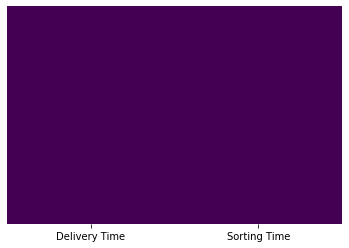

In [4]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap="viridis")#Here we see no any faded color is shown, so data has no any missing values

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


###  Defining response variable(y) and explanatory variable(x)

In [6]:
x=data["Sorting Time"]
y=data["Delivery Time"]

### Scatter plot and correlation analysis

Text(0, 0.5, 'Years experience')

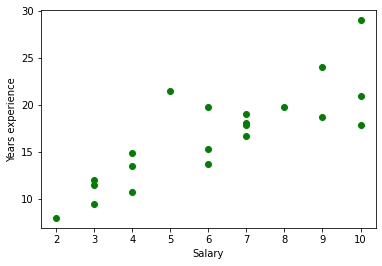

In [7]:
plt.scatter(x,y,color="green")
plt.xlabel("Salary")
plt.ylabel("Years experience")

#### Correlation analysis

In [8]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


<AxesSubplot:>

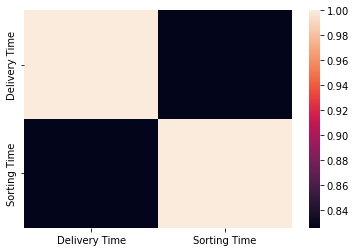

In [9]:
sns.heatmap(data.corr())

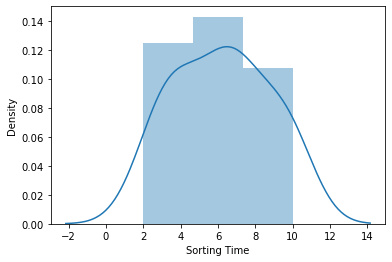

In [11]:
sns.distplot(x)
plt.show()


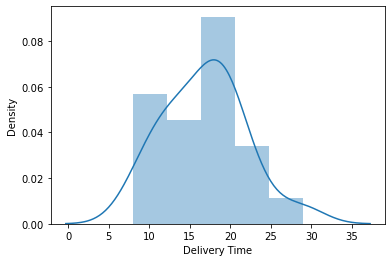

In [12]:
sns.distplot(y)
plt.show()


## Model fitting

Fitting a Linear Regression Model

In [55]:
x2=smf.add_constant(x)
model = smf.OLS(y,x2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 08 Jul 2022   Prob (F-statistic):           3.98e-06
Time:                        08:31:14   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            6.5827      1.722      3.823      0.001       2.979      10.186
Sorting Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Standardised residual plot corresponding first order model

In [56]:
E=model.resid_pearson#Residual
E

array([-0.70630355,  0.10943679,  1.11524837,  0.87774154,  2.01950985,
       -0.383949  ,  0.2978383 , -0.69160484, -1.76255624, -0.9110735 ,
        0.01877637, -0.82756157, -0.49264758, -0.0101515 ,  0.17043364,
        0.5796396 , -0.92911167, -0.00540844, -0.64082979, -0.10081191,
        2.27338512])

In [57]:
y_hat=model.predict(x2)#predicted value
y_hat.head()

0    23.072933
1    13.178814
2    16.476853
3    21.423913
4    23.072933
dtype: float64

In [58]:
comparing_predicted_value=pd.DataFrame({"Predicted value":y_hat,
                                       "Given_Acutal_value":y})
comparing_predicted_value

,Predicted value,Given_Acutal_value
0,23.072933,21.00
1,13.178814,13.50
2,16.476853,19.75
3,21.423913,24.00
4,23.072933,29.00
5,16.476853,15.35
6,18.125873,19.00
7,11.529794,9.50
8,23.072933,17.90
9,21.423913,18.75


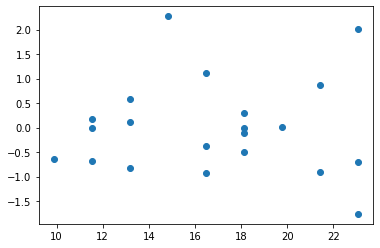

In [59]:
plt.scatter(y_hat,E) # Also here we see no any patterns in the plot so this model gives the correct result

### Plotting the fitted line to the original dataset

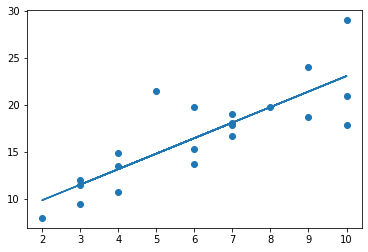

In [60]:
plt.scatter(x,y)
plt.plot(x,y_hat)

#### Above figure show that straight light fit approximately good to the dataset

In [61]:
#Coefficients
model.params

const           6.582734
Sorting Time    1.649020
dtype: float64

In [62]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

const           3.823349
Sorting Time    6.387447
dtype: float64 
 const           0.001147
Sorting Time    0.000004
dtype: float64


In [63]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Predict for new data point

In [64]:
# Lets take any values :- like 11 and 13 sorting time, we have to predict its delivery time
newdata=pd.Series([11,13])

In [65]:
data_pred=pd.DataFrame(newdata,columns=['Delivery time'])
data_pred

,Delivery time
0,11
1,13


In [66]:
data_pred=smf.add_constant(data_pred["Delivery time"])

In [67]:
model.predict(data_pred)# Here is the output

0    24.721953
1    28.019993
dtype: float64